# Name:Mohammed Alshehri
    


# Student Number:19209233


# COMP30850 Assignment 1    

In this assigment we will Construct, characterise, and compare network representations of two
movie-related datasets from IMDb.

In [320]:
from IPython.display import Image
Image(url= "https://miro.medium.com/max/705/1*f-bF79_zFHGXEhJvx2WPLg.jpeg", width=600, height=600)


# Task 1:

I'll build and describe network representations of two movie-related datasets for this project. The co-starring relationships between the performers in these two datasets will be modelled by my networks. I'll build each of my networks and contrast their organisation, connection, and centrality. In order to explore the structure, connectedness, and centrality of the ego networks, I will first choose one significant node from each dataset and build an ego network for each.

importing libaries needed

In [321]:
import numpy as np 
import pandas as pd  
import json  
from itertools import combinations 
import networkx as nx 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

loading data 1 is useful in pandas to view everything, not just the beginning of the data when loading it.

In [322]:
# loading data 1
# usefull to show everything not only the start of the data when loading it , usefull in pandas to see everything.
pd.set_option("display.precision", 3)
# data set 1 with json loding to see the what is happenning in the data set
with open('19209233-dataset1.json') as data_1:
    Data_Net1 = json.load(data_1)
    print(Data_Net1)

[{'id': '1209966', 'name': 'Oscar Isaac', 'born': '1979-03-09', 'movies': [{'id': '24175704', 'title': 'Case 63', 'year': 2022, 'kind': 'movie'}, {'id': '10234724', 'title': 'Moon Knight', 'year': 2022, 'kind': 'movie'}, {'id': '10308878', 'title': 'Big Gold Brick', 'year': 2022, 'kind': 'movie'}, {'id': '11125620', 'title': 'The Addams Family 2', 'year': 2021, 'kind': 'movie'}, {'id': '12682218', 'title': 'Scenes from a Marriage', 'year': 2021, 'kind': 'movie'}, {'id': '1160419', 'title': 'Dune', 'year': 2021, 'kind': 'movie'}, {'id': '11196036', 'title': 'The Card Counter', 'year': 2021, 'kind': 'movie'}, {'id': '11962160', 'title': 'The Letter Room', 'year': 2020, 'kind': 'movie'}, {'id': '2527338', 'title': 'Star Wars: Episode IX - The Rise of Skywalker', 'year': 2019, 'kind': 'movie'}, {'id': '11559486', 'title': 'Star Wars: Rise of the Resistance', 'year': 2019, 'kind': 'movie'}, {'id': '1620981', 'title': 'The Addams Family', 'year': 2019, 'kind': 'movie'}, {'id': '1488606', 'ti

loading data 2 is useful in pandas to view everything, not just the beginning of the data when loading it.

In [323]:
# loading data 2
# usefull to show everything not only the start of the data when loading it , usefull in pandas to see everything.
pd.set_option("display.precision", 3)
# data set 1 with json loding to see the what is happenning in the data set
with open('19209233-dataset1.json') as data_2:
    Data_Net2 = json.load(data_2)
    print(Data_Net2)

[{'id': '1209966', 'name': 'Oscar Isaac', 'born': '1979-03-09', 'movies': [{'id': '24175704', 'title': 'Case 63', 'year': 2022, 'kind': 'movie'}, {'id': '10234724', 'title': 'Moon Knight', 'year': 2022, 'kind': 'movie'}, {'id': '10308878', 'title': 'Big Gold Brick', 'year': 2022, 'kind': 'movie'}, {'id': '11125620', 'title': 'The Addams Family 2', 'year': 2021, 'kind': 'movie'}, {'id': '12682218', 'title': 'Scenes from a Marriage', 'year': 2021, 'kind': 'movie'}, {'id': '1160419', 'title': 'Dune', 'year': 2021, 'kind': 'movie'}, {'id': '11196036', 'title': 'The Card Counter', 'year': 2021, 'kind': 'movie'}, {'id': '11962160', 'title': 'The Letter Room', 'year': 2020, 'kind': 'movie'}, {'id': '2527338', 'title': 'Star Wars: Episode IX - The Rise of Skywalker', 'year': 2019, 'kind': 'movie'}, {'id': '11559486', 'title': 'Star Wars: Rise of the Resistance', 'year': 2019, 'kind': 'movie'}, {'id': '1620981', 'title': 'The Addams Family', 'year': 2019, 'kind': 'movie'}, {'id': '1488606', 'ti

# Network construction

In [324]:
Net_Dataz1 = json.load(open('19209233-dataset1.json', 'r'))
Net_Dataz2 = json.load(open('19209233-dataset2.json', 'r'))

print(f'Dataset 1) type: {type(Net_Dataz1)}, size: {len(Net_Dataz1)}')
print(f'Dataset 2) type: {type(Net_Dataz2)}, size: {len(Net_Dataz2)}')

Dataset 1) type: <class 'list'>, size: 189
Dataset 2) type: <class 'list'>, size: 205


Now we check The length for each DataSet To know what we are working with and determine Whats the next step 

In [325]:
# printing the lenght of the two data sets
print("length of first Data:",len(Net_Dataz1))
print("length of Second Data:",len(Net_Dataz2))

length of first Data: 189
length of Second Data: 205


As it displayed the first DataSet is smaller in length Than the second DataSet

Now we will print the keys of this file and what's inside it like heading and dictonaries So when setting up the DataFrame we know whats inside of it before Creating the DataFrame 

In [326]:
def print_structure(d: dict, indent: int = 1) -> None:
    for key, value in d.items():
        print('____' * indent + str(key))
        if isinstance(value, dict):
            print_structure(value, indent+1)
        else:
            try:
                print_structure(value[0], indent+1)
            except:
                pass


print_structure(Net_Dataz1[0])

____id
____name
____born
____movies
________id
________title
________year
________kind


each row corresponds to an actor, and contains an id string, name, date of birth, and a list of dictionaries containing data about the movies they have acted in. These dictionaries contain movie id, title, year the movie was made, and the kind of movie.

Construct Dataframes for Network 1



Set Index Function

Set the index in movies and actors dataframes to movie and actor ids.

In [327]:
#putting it in the dtaframes from 1 & 2
DataFrame1 = pd.read_json (r"19209233-dataset1.json")
DataFrame2 = pd.read_json(r"19209233-dataset1.json")
# setting the index to id for the first data set 
DataFrame1.set_index(['id'])

,name,born,movies
id,,,
1209966,Oscar Isaac,1979-03-09,"[{'id': '24175704', 'title': 'Case 63', 'year'..."
190,Matthew McConaughey,1969-11-04,"[{'id': '16248012', 'title': 'Come Home', 'yea..."
567945,Peter McDonald,1972-01-28,"[{'id': '1877830', 'title': 'The Batman', 'yea..."
379,Kirsten Dunst,1982-04-30,"[{'id': '10293406', 'title': 'The Power of the..."
177639,Jennifer Coolidge,1961-08-28,"[{'id': '9686790', 'title': 'Shotgun Wedding',..."
...,...,...,...
731772,Cliff Robertson,1923-09-09,"[{'id': '0413300', 'title': 'Spider-Man 3', 'y..."
2257207,Daniel Kaluuya,1989-02-24,"[{'id': '23865086', 'title': 'Oliver Twist', '..."
540441,Jena Malone,1984-11-21,"[{'id': '14960854', 'title': 'Swallowed', 'yea..."


each row corresponds to an actor, and contains an id string, name, date of birth, and a list of dictionaries containing data about the movies they have acted in. These dictionaries contain movie id, title, year the movie was made, and the kind of movie.

In [328]:
# setting the index to id for the first data set 
DataFrame2.set_index(['id'])

,name,born,movies
id,,,
1209966,Oscar Isaac,1979-03-09,"[{'id': '24175704', 'title': 'Case 63', 'year'..."
190,Matthew McConaughey,1969-11-04,"[{'id': '16248012', 'title': 'Come Home', 'yea..."
567945,Peter McDonald,1972-01-28,"[{'id': '1877830', 'title': 'The Batman', 'yea..."
379,Kirsten Dunst,1982-04-30,"[{'id': '10293406', 'title': 'The Power of the..."
177639,Jennifer Coolidge,1961-08-28,"[{'id': '9686790', 'title': 'Shotgun Wedding',..."
...,...,...,...
731772,Cliff Robertson,1923-09-09,"[{'id': '0413300', 'title': 'Spider-Man 3', 'y..."
2257207,Daniel Kaluuya,1989-02-24,"[{'id': '23865086', 'title': 'Oliver Twist', '..."
540441,Jena Malone,1984-11-21,"[{'id': '14960854', 'title': 'Swallowed', 'yea..."


In [329]:
def create_network(dataset: list) -> nx.Graph():

    # number of movies in which two actors co-star
    def count_common_movies(actor1: dict, actor2: dict) -> int:
        movies1 = set(m['id'] for m in actor1['movies'])
        movies2 = set(m['id'] for m in actor2['movies'])
        return len(movies1.intersection(movies2))

    g = nx.Graph()
    # iterate through every pair of actors
    for actor1, actor2 in combinations(dataset, r=2):
        common_movies = count_common_movies(actor1, actor2)

        # only add edges if actors co-star in at least one movie (thus preventing isolated nodes)
        if common_movies != 0:
            g.add_edge(actor1['name'], actor2['name'], weight=common_movies)
    return g


net1 = create_network(Net_Dataz1)
net2 = create_network(Net_Dataz2)

The resulting graph represents a network of actors who co-starred in at least one movie together. The code creates two such graphs, net1 and net2, using different datasets.

# Task 2

Checking if the first network and second network is directed or not using the function is_directed

In [330]:
netz1_directed = net1.is_directed()
netz2_directed = net2.is_directed()

print('first network',netz1_directed)
print('second network',netz2_directed)

first network False
second network False


Now We will check each network size 

In [331]:
def size(net: nx.Graph) -> None:
    print(f'Number of nodes For network1: {net.number_of_nodes()}')
    print(f'Number of edges for nerwork1: {net.number_of_edges()}')


size(net1)

Number of nodes For network1: 159
Number of edges for nerwork1: 393


In [332]:
def size(net: nx.Graph) -> None:
    print(f'Number of nodes For network2: {net.number_of_nodes()}')
    print(f'Number of edges for nerwork2: {net.number_of_edges()}')


size(net2)

Number of nodes For network2: 173
Number of edges for nerwork2: 422


Now we use the list Function list() to see the contents of each network it will display the list of name of actors 

In [333]:
list(net1.nodes())

['Oscar Isaac',
 'Daisy Ridley',
 'Stellan Skarsgård',
 'Samuel L. Jackson',
 'Mahershala Ali',
 'Charlize Theron',
 'Liev Schreiber',
 'Julianne Moore',
 'John Boyega',
 'Adam Driver',
 'Andy Serkis',
 'Willem Dafoe',
 'Mark Hamill',
 'Liam Neeson',
 'Domhnall Gleeson',
 'Matthew McConaughey',
 'Kirsten Dunst',
 'Jonah Hill',
 'Colin Farrell',
 'Anne Hathaway',
 'Reese Witherspoon',
 'Brie Larson',
 'Jennifer Hudson',
 'Peter McDonald',
 'Ralph Fiennes',
 'Barry Keoghan',
 'Marlee Matlin',
 'Viggo Mortensen',
 'Nicole Kidman',
 'Tina Fey',
 'Jennifer Coolidge',
 'Luke Wilson',
 'Cher',
 'Katherine Heigl',
 'Diane Keaton',
 'Tom Wilkinson',
 'Al Pacino',
 'Joe Pesci',
 'Holly Hunter',
 'Robert De Niro',
 'Paul Newman',
 'Jessica Tandy',
 'Broderick Crawford',
 'José Ferrer',
 'Naomi Watts',
 'Russell Crowe',
 'Leslie Mann',
 'Mads Mikkelsen',
 'Kate Winslet',
 'Justin Theroux',
 'Matthew Perry',
 'Ginnifer Goodwin',
 'Jon Bernthal',
 'Viola Davis',
 'Sandra Bullock',
 'Aidan Gillen',
 

In [334]:
list(net2.nodes())

['Peter Mayhew',
 'Alec Guinness',
 'Bette Midler',
 'Chloë Grace Moretz',
 'Abigail Breslin',
 'Vera Farmiga',
 'Patrick Wilson',
 'Ewan McGregor',
 'John Goodman',
 'Killian Scott',
 'Sam Rockwell',
 'Christian Bale',
 'Jamie Dornan',
 'Amy Adams',
 'Saoirse Ronan',
 'John Malkovich',
 'Steve Carell',
 'Adrien Brody',
 'Jennifer Garner',
 'Jason Segel',
 'Bryan Cranston',
 'Rebel Wilson',
 'Robert Sheehan',
 'Scarlett Johansson',
 'Michelle Williams',
 'Jack Black',
 'Paul Rudd',
 'Helen Mirren',
 'Burt Lancaster',
 'Sidney Poitier',
 'Sam Neill',
 'Chris Rock',
 'Natalie Portman',
 'Brad Pitt',
 'Melissa McCarthy',
 'Matt Damon',
 'Idris Elba',
 'Martin McCann',
 'Judi Dench',
 'F. Murray Abraham',
 'Taron Egerton',
 'Kim Basinger',
 'Emily Blunt',
 'Anamaria Marinca',
 'Mark Strong',
 'Jennifer Jason Leigh',
 'Hugo Weaving',
 'Gary Oldman',
 'Glenn Close',
 'Emma Stone',
 'Toni Collette',
 'Terry Crews',
 'Kurt Russell',
 'Jason Statham',
 'Goldie Hawn',
 'Sylvester Stallone',
 'Ma

# Weight Distribution

Next I will look at the disribution of the weights. Recall that the weight between two nodes in the network is the number of movies that the two actors acted together in.

Weight Distribution Histogram

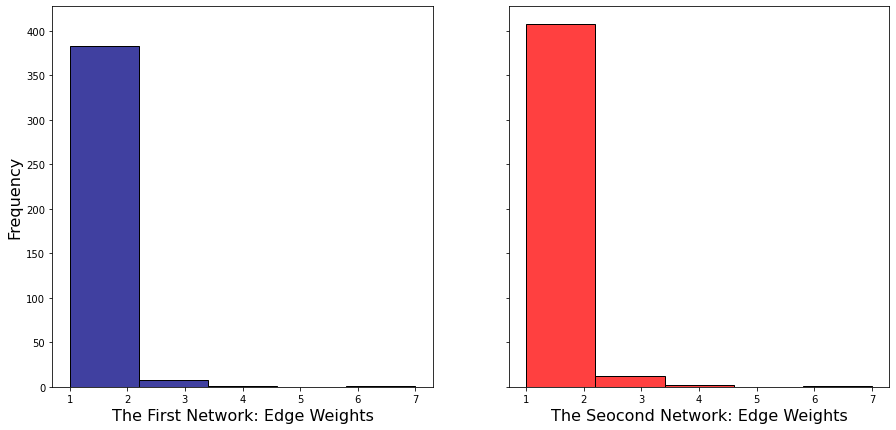

In [335]:
weights1 = [edge[-1]['weight'] for edge in net1.edges(data=True)]
weights2 = [edge[-1]['weight'] for edge in net2.edges(data=True)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(15, 7), sharex=True, sharey=True)
sns.histplot(data=weights1, bins=5, color='Navy', ax=ax1)
ax1.set_xlabel('The First Network: Edge Weights', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)

sns.histplot(data=weights2, bins=5, color='red', ax=ax2)
ax2.set_xlabel('The Seocond Network: Edge Weights', fontsize=16)
plt.show()

# Top Co-starring Relationships

Now we will show The relatiohips between the actors From the highest to the lowest In the first Network


In [336]:
pd.set_option("display.precision", 3)


# top 25 edges by weight
def top_co_stars(net: nx.Graph) -> pd.DataFrame:
    df = nx.to_pandas_edgelist(net)
    df.columns = ['actor1', 'actor2', 'num_movies']
    return df.sort_values(by='num_movies', ascending=False).head(25)


top_co_stars(net1)

,actor1,actor2,num_movies
307,Oliver Phelps,James Phelps,7
25,Daisy Ridley,Domhnall Gleeson,4
304,Oliver Phelps,Chris Rankin,3
124,Matthew McConaughey,Reese Witherspoon,3
69,John Boyega,Adam Driver,3
74,John Boyega,Domhnall Gleeson,3
86,Adam Driver,Domhnall Gleeson,3
20,Daisy Ridley,Adam Driver,3
18,Daisy Ridley,John Boyega,3
356,Philip Seymour Hoffman,Jennifer Lawrence,3


Now we will do the same but for the second Network

In [337]:
pd.set_option("display.precision", 3)


# top 25 edges by weight
def top_co_stars(net: nx.Graph) -> pd.DataFrame:
    df = nx.to_pandas_edgelist(net)
    df.columns = ['actor1', 'actor2', 'num_movies']
    return df.sort_values(by='num_movies', ascending=False).head(25)


top_co_stars(net2)

,actor1,actor2,num_movies
351,Mark Williams,Devon Murray,7
11,Vera Farmiga,Patrick Wilson,4
65,Amy Adams,Jesse Eisenberg,4
125,Scarlett Johansson,Chris Evans,3
268,Gwyneth Paltrow,Chris Evans,3
238,Kurt Russell,Jason Statham,3
371,Kelly Marie Tran,Anthony Daniels,3
134,Scarlett Johansson,William Hurt,3
294,Chris Evans,Mark Ruffalo,3
356,Bonnie Wright,Devon Murray,3


# Density, Connectedness and Paths

We may examine the network density to better characterise the network topology. The percentage of possible edges between nodes in a network that actually exist as edges is referred to as network density. A network with a high density is referred to as dense, and one with a low density as sparse.

The ratio of existent edges to the total number of possible edges between all pairs of nodes is used to mathematically determine density.

In [338]:
print(f'Network 1 density: {nx.density(net1):.3f}')
print(f'Network 2 density: {nx.density(net2):.3f}')

Network 1 density: 0.031
Network 2 density: 0.028


The density is 0 for a graph without edges and 1 for a complete graph. The density of multigraphs can be higher than 1.

Self loops are counted in the total number of edges so graphs with self loops can have density higher than 1.

Checking if the first network is still connected 

Using the is connnected() method to determine whether the first network is connected: There is only one separate linked component left in the network today. Using the function connected components(), we may loop through those components:

In [339]:
nx.is_connected(net1), nx.number_connected_components(net1)


(False, 4)

In [340]:
list(len(component) for component in nx.connected_components(net1))


[153, 2, 2, 2]

Using the is connnected() method to determine whether the Second network is connected: There is only one separate linked component left in the network today. Using the function connected components(), we may loop through those components:

In [341]:
nx.is_connected(net2), nx.number_connected_components(net2)


(False, 5)

Now we will get the diamater of the networks

In [342]:
Biggest_Comp = list(nx.connected_components(net1))[0]
print('Network 1 diameter (larger component only): ' + f'{nx.diameter(nx.subgraph(net1, Biggest_Comp))}')
print(f'Network 2 diameter (full network): {nx.diameter(net2)}')

Network 1 diameter (larger component only): 10


NetworkXError: Found infinite path length because the graph is not connected

In [343]:
print(f'Network 1 average shortest path length (Biggest component only): ' +
      f'{nx.average_shortest_path_length(nx.subgraph(net1, Biggest_Comp)):.3f}')
print(f'Network 2 average shortest path length: ' +
      f'{nx.average_shortest_path_length(net2):.3f}')

Network 1 average shortest path length (Biggest component only): 3.696


NetworkXError: Graph is not connected.

# Clustering Coefficient

We can compute the scores for every node in both networks (displaying only the top 25), as well as the average scores for the full networks.



In [344]:
# cluster coefficient first
# storing results into datframe 
DataFrame = pd.DataFrame.from_dict(nx.clustering(net1), orient = "index", columns=['Cluster Coefficient 1'])
# sort values from highest to lowest
dataframe_cluster_coffecient1 =DataFrame.sort_values(by = "Cluster Coefficient 1",ascending = False)
#  displaying only the first 10 that highest that shows in the dataframe
dataframe_cluster_coffecient1.head(25)

,Cluster Coefficient 1
Elizabeth Berrington,1.000
Richard Harris,1.000
Demi Moore,1.000
Vincent D'Onofrio,1.000
Denzel Washington,1.000
Joe Pesci,1.000
Jennifer Coolidge,1.000
Glenda Jackson,1.000
Domhnall Gleeson,0.711
Jeff Bridges,0.700


Now we will do the same thing for the second coefficent 

In [345]:
 
DataFrame = pd.DataFrame.from_dict(nx.clustering(net2), orient='index', columns=['Cluster Coefficient 2'])
# sort values from highest to lowest
dataframe_cluster_coffecient2 =DataFrame.sort_values(by = "Cluster Coefficient 2",ascending = False)
#  displaying only the first 10 that highest that shows in the dataframe
dataframe_cluster_coffecient2.head(25)

,Cluster Coefficient 2
Golshifteh Farahani,1.000
Matt Lucas,1.000
Bruce Willis,1.000
Brian Caspe,1.000
Ray Stevenson,1.000
Billy Dee Williams,1.000
Alan Rickman,1.000
Winona Ryder,1.000
Bonnie Wright,1.000
Drew Barrymore,1.000


Clustering coefficient indicates the level of concentration of edges in the neighbourhood of a node. It is the fraction of pairs of its neighbours that have edges between one another - i.e. how many closed triads around this node.

(Closed triad = if a node A is connected to nodes B and C, and B and C are also connected, then A, B and C form a closed triad.)

We can calculate the average clustering coefficient of all of the nodes in the network.

In [346]:
print('Network 1 average clustering coefficient: ' + 
      f'{nx.average_clustering(net1):.3f}')
print('Network 2 average clustering coefficient: ' + 
      f'{nx.average_clustering(net2):.3f}')

Network 1 average clustering coefficient: 0.221
Network 2 average clustering coefficient: 0.251


# Degree Distrbution 

Degree range: [1, 17]
Mean degree: 4.94
Median degree: 4.00


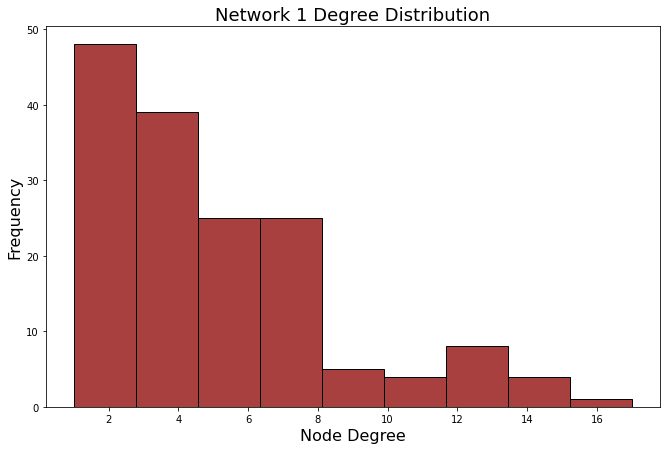

In [347]:
# compute node degree statistics and plot distribution
def degree_stats(net: nx.Graph, num: int) -> None:
    deg = pd.Series(dict(nx.degree(net)))
    print(f'Degree range: [{deg.min()}, {deg.max()}]')
    print(f'Mean degree: {deg.mean():.2f}')
    print(f'Median degree: {deg.median():.2f}')

    plt.figure(figsize=(11, 7))
    sns.histplot(data=deg, color='darkred' if num == 1 else 'teal')
    plt.title(f'Network {num} Degree Distribution', fontsize=18)
    plt.xlabel('Node Degree', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()


degree_stats(net1, 1)

Degree Summary Statistics: ^^


Now we will do the same for the Second Network

Degree range: [1, 19]
Mean degree: 4.88
Median degree: 4.00


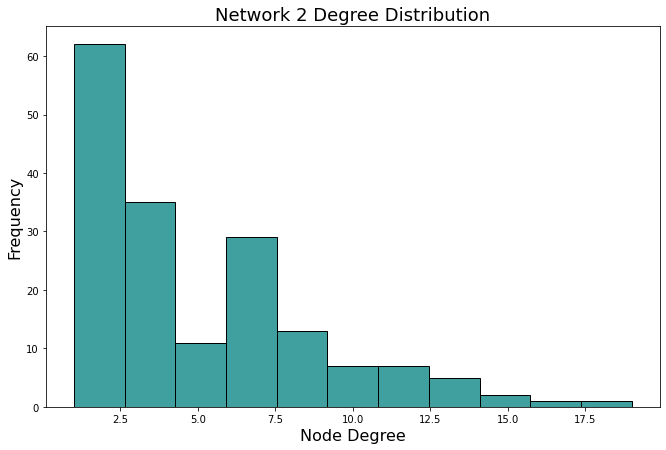

In [348]:
def degree_stats(net: nx.Graph, num: int) -> None:
    deg = pd.Series(dict(nx.degree(net)))
    print(f'Degree range: [{deg.min()}, {deg.max()}]')
    print(f'Mean degree: {deg.mean():.2f}')
    print(f'Median degree: {deg.median():.2f}')

    plt.figure(figsize=(11, 7))
    sns.histplot(data=deg, color='navy' if num == 1 else 'teal')
    plt.title(f'Network {num} Degree Distribution', fontsize=18)
    plt.xlabel('Node Degree', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()


degree_stats(net2, 2)

 degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

In [349]:
def degree_centrality(net: nx.Graph) -> pd.DataFrame:
    deg_cen = dict(nx.degree_centrality(net))
    return pd.DataFrame.from_dict(deg_cen, orient='index', columns=['degree_centrality'])

In [350]:
# Network 1
net1_DataFrame = degree_centrality(net1)
net1_DataFrame.sort_values(by='degree_centrality', ascending=False)

,degree_centrality
Andy Serkis,0.108
Adam Driver,0.095
Oscar Isaac,0.089
Marisa Tomei,0.089
Daisy Ridley,0.089
...,...
José Ferrer,0.006
Debra Messing,0.006
Marlee Matlin,0.006
Leonor Watling,0.006


In [351]:
# Network 2
net2_DataFrame = degree_centrality(net2)
net2_DataFrame.sort_values(by='degree_centrality', ascending=False)

,degree_centrality
Scarlett Johansson,0.110
Sam Rockwell,0.099
Chris Evans,0.087
Josh Brolin,0.087
Mark Ruffalo,0.081
...,...
Jackie Chan,0.006
Geena Davis,0.006
Jonathan Rhys Meyers,0.006
Sissy Spacek,0.006


As you can see Andy Serkis and Scarlett Johansson Have the highest degree_centrality Which is 0.108 and 0.110 

Betweenness centrality assumes that the nodes which connect most of the other nodes in the shortest possible way are most important.

 

In [352]:
def betweenness(df: pd.DataFrame, net: nx.Graph, weight: str = None) -> pd.DataFrame:
    bet = nx.betweenness_centrality(net, weight=weight)
    title = 'betweenness' if not weight else 'weighted_betweenness'
    df[title] = pd.Series(bet)
    return pd.DataFrame(df[title].sort_values(ascending=False))

In [353]:
betweenness(net1_DataFrame, net1)

,betweenness
Robert De Niro,0.088
Andy Serkis,0.082
Justin Theroux,0.076
Adam Driver,0.072
Daisy Ridley,0.066
...,...
Anna Kendrick,0.000
Paul Newman,0.000
Julie Delpy,0.000
Maya Rudolph,0.000


In [354]:
betweenness(net2_DataFrame, net2)

,betweenness
Sam Rockwell,0.099
Meryl Streep,0.095
Emily Blunt,0.087
Scarlett Johansson,0.081
Josh Brolin,0.064
...,...
Jackie Chan,0.000
Geena Davis,0.000
Bruce Willis,0.000
Jonathan Rhys Meyers,0.000


weighted betweenness centrality 

In [355]:
#The first Network
betweenness(net1_DataFrame, net1, 'weight')

,weighted_betweenness
Andy Serkis,0.106
Robert De Niro,0.090
Justin Theroux,0.088
Colin Farrell,0.064
Adam Driver,0.061
...,...
Mélanie Laurent,0.000
Paul Newman,0.000
Jennifer Coolidge,0.000
Debra Messing,0.000


In [356]:
# The Second Network
betweenness(net2_DataFrame, net2, 'weight')


,weighted_betweenness
Emily Blunt,0.107
Sam Rockwell,0.102
Meryl Streep,0.089
Ewan McGregor,0.068
Emma Stone,0.065
...,...
Jackie Chan,0.000
Geena Davis,0.000
Bruce Willis,0.000
Jonathan Rhys Meyers,0.000


In [357]:
# degree closenees centrality for network 1 
DataFrame = pd.DataFrame.from_dict(nx.closeness_centrality(net1), orient='index', columns=['Closeness centrality'])
DataFrame_Network_1_closenes_centrality =DataFrame.sort_values(by = "Closeness centrality",ascending = False)
DataFrame_Network_1_closenes_centrality.head(25)

,Closeness centrality
Andy Serkis,0.371
John Boyega,0.366
Adam Driver,0.356
Oscar Isaac,0.353
Justin Theroux,0.351
Barry Keoghan,0.347
Colin Farrell,0.347
Daisy Ridley,0.347
Willem Dafoe,0.343
Mark Hamill,0.343


In [358]:
# degree closeness centrality for network 2 
DataFrame = pd.DataFrame.from_dict(nx.closeness_centrality(net2), orient='index', columns=['Closeness centrality'])
DataFrame_Network_2_closenes_centrality =DataFrame.sort_values(by = "Closeness centrality",ascending = False)
DataFrame_Network_2_closenes_centrality.head(25)

,Closeness centrality
Scarlett Johansson,0.358
Sam Rockwell,0.358
Josh Brolin,0.346
Mark Ruffalo,0.339
Bill Murray,0.333
Chris Evans,0.333
Matt Damon,0.333
Meryl Streep,0.330
Saoirse Ronan,0.328
Bryan Cranston,0.325


# Eigenvector Centrality

The qualitative nature of a vertex's connections is attempted to be captured via eigenvector centrality. It is a straightforward extension of degree centrality, which says that a node's centrality is inversely correlated with the significance of its neighbours. Not all neighbours of a node are equally significant when we add up all of its connections, and eigenvector centrality recognises this.

To enable comparisons between various networks, the normalised eigenvector centrality is frequently provided. In the first network, normalisation is carried out in relation to the highest value in the present network.



In [359]:
#compute eigenvector centrality (including normalised) (optionally weighted) and return double column DataFrame
def eigenvector(DataFrame: pd.DataFrame, net: nx.Graph, weight: str = None) -> pd.DataFrame:
    eigen = nx.eigenvector_centrality(net, weight=weight)
    values = pd.Series(eigen)
    title = 'eigenvector' if not weight else 'weighted_eigenvector'

    DataFrame[title] = values
    DataFrame[f'norm_{title}'] = values/max(values)
    return DataFrame[[title, f'norm_{title}']].sort_values(by=title, ascending=False)


# Network 1
eigenvector(net1_DataFrame, net1)

,eigenvector,norm_eigenvector
Andy Serkis,3.166e-01,1.000e+00
John Boyega,2.945e-01,9.302e-01
Adam Driver,2.928e-01,9.248e-01
Oscar Isaac,2.907e-01,9.183e-01
Daisy Ridley,2.846e-01,8.987e-01
...,...,...
Seth Rogen,1.222e-21,3.859e-21
Jessica Tandy,1.222e-21,3.859e-21
David Tennant,1.222e-21,3.859e-21
Broderick Crawford,1.222e-21,3.859e-21


Now we will do the same for the second network 

In [360]:
eigenvector(net2_DataFrame, net2)


,eigenvector,norm_eigenvector
Scarlett Johansson,3.295e-01,1.000e+00
Josh Brolin,2.745e-01,8.331e-01
Chris Evans,2.713e-01,8.234e-01
Mark Ruffalo,2.670e-01,8.103e-01
Gwyneth Paltrow,2.335e-01,7.086e-01
...,...,...
Burt Lancaster,1.688e-27,5.122e-27
Alec Guinness,1.688e-27,5.122e-27
Nikolaj Coster-Waldau,1.688e-27,5.122e-27
Paprika Steen,1.688e-27,5.122e-27


Now i will create a graph That will create a comparrision between Degree Centrality Between net 2 and net 1

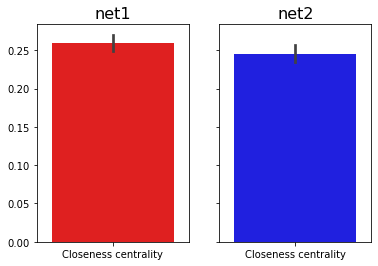

In [361]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

sns.barplot(data=DataFrame_Network_1_closenes_centrality, ax=ax1, color='red')
ax1.set_title('net1', fontsize=16)

sns.barplot(data=DataFrame_Network_2_closenes_centrality, ax=ax2, color='blue')
ax2.set_title('net2', fontsize=16)
plt.show()


As we can see net 1 Which is network 1 is higher than net 2 in the closness of Centrality net 1 is more than 0.25 and net2 is less than 0.25 

# Task 2 ending summarry 

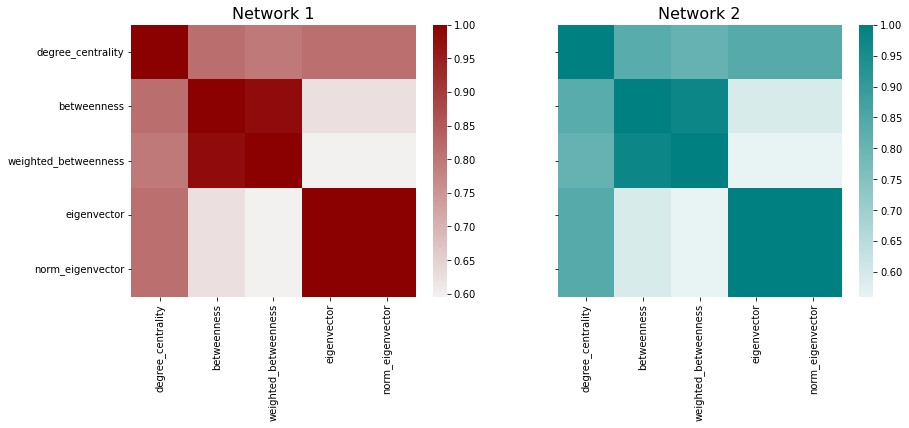

In [362]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(14, 5), sharex=True, sharey=True)
sns.heatmap(data=net1_DataFrame.corr(), cmap=sns.light_palette(
    'darkred', as_cmap=True), ax=ax1)
ax1.set_title('Network 1', fontsize=16)

sns.heatmap(data=net2_DataFrame.corr(), cmap=sns.light_palette(
    'teal', as_cmap=True), ax=ax2)
ax2.set_title('Network 2', fontsize=16)
plt.show()

The Size of the two netwroks are clsoe to each other There isn't That big of a diffrence between one and another
And also for the dinesty you can see that both of them are almost 0.030 That means that they are close in range
In the both Two networks ne1, net2 We can see that the highest number that the actors co started together is 7 so thers another strong relationship between these Two networks And also We can see that both networks are directed these are also same major common factors between them 


# Task 3

# Network Thresholding 

Now we will use Net1 and Net2 we will convert it from weighted netwrk to a new unweighted network

First We will check Then length of the first netwok To see what we are working with 

In [363]:
print (len(net1))
print(nx.number_connected_components(net1))

159
4


Storing the DataFrame To the First network 

In [364]:
DataFrame = nx.to_pandas_edgelist(net1)
store = DataFrame.sort_values(by = 'weight', ascending=False).head(25)
store.head(25)

,source,target,weight
307,Oliver Phelps,James Phelps,7
25,Daisy Ridley,Domhnall Gleeson,4
304,Oliver Phelps,Chris Rankin,3
124,Matthew McConaughey,Reese Witherspoon,3
69,John Boyega,Adam Driver,3
74,John Boyega,Domhnall Gleeson,3
86,Adam Driver,Domhnall Gleeson,3
20,Daisy Ridley,Adam Driver,3
18,Daisy Ridley,John Boyega,3
356,Philip Seymour Hoffman,Jennifer Lawrence,3


Now we will draw it to see how it looks like

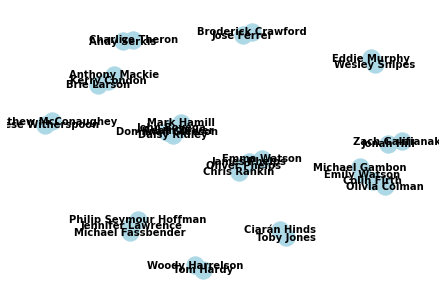

In [365]:

# Convert the network to a pandas dataframe
DataFrame = nx.to_pandas_edgelist(net1)

# Get the top 25 edges with the highest weights
store = DataFrame.sort_values(by='weight', ascending=False).head(25)

# Create a new network from the dataframe
G = nx.from_pandas_edgelist(store, 'source', 'target', edge_attr='weight')

# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


Storing the DataFrame To the Second network 

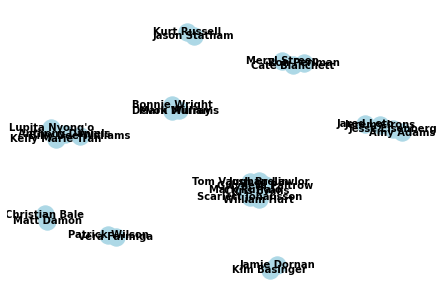

In [366]:

# Convert the network to a pandas dataframe
DataFrame = nx.to_pandas_edgelist(net2)

# Get the top 25 edges with the highest weights
store = DataFrame.sort_values(by='weight', ascending=False).head(25)

# Create a new network from the dataframe
G = nx.from_pandas_edgelist(store, 'source', 'target', edge_attr='weight')

# Visualize the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


Checking the length of the Second network net2

In [367]:
print (len(net2))
print(nx.number_connected_components(net2))

173
5


# ego network around the node
# Task 4

In [368]:

def Display_node(net: nx.Graph, num: int, node: str) -> None:
    # create ego network and set layout (param k increases distance between nodes)
    eg = nx.ego_graph(net, node)
    pos = nx.spring_layout(eg, k=2.25)
    
    plt.figure(figsize=(20, 20))
    plt.margins(0.1, 0.1)
    title = f'node network for {node} ({eg.number_of_nodes()} nodes) (Network {num})'
    plt.title(title, fontsize=16)
    
    # draw the full network
    nx.draw(eg, pos, with_labels=True, font_size=12, node_size=500, node_color='Blue', edge_color='green')
    
    # draw the ego in a different color with larger node size
    nx.draw_networkx_nodes(eg, pos, nodelist=[node], node_size=2500, node_color='#c09591' if num == 1 else '#89d5d2')
    plt.axis("off")
    plt.show()
    
    # compute network characteristics
    print(f'Network {num} node: {node}')
    print(f'Number of nodes: {eg.number_of_nodes()}')
    print(f'Number of edges: {eg.number_of_edges()}')
    print(f'Density: {nx.density(eg):.3f}')
    print(f'Connected: {nx.is_connected(eg)}')
    print(f'Diameter: {nx.diameter(eg)}')
    print(f'Average shortest path length: {nx.average_shortest_path_length(eg):.3f}')
    print(f'Average clustering coefficient: {nx.average_clustering(eg):.3f}')
    print(f'Average degree: {pd.Series(dict(nx.degree(eg))).mean():.3f}')


    


Now what we will do is Taking all of the statistics and combining them to see the number of nodes, edges, density, how many are connected in the ego network, the average degree, average shortest path, diameter, and cluster cofficient in the single network from the second network.

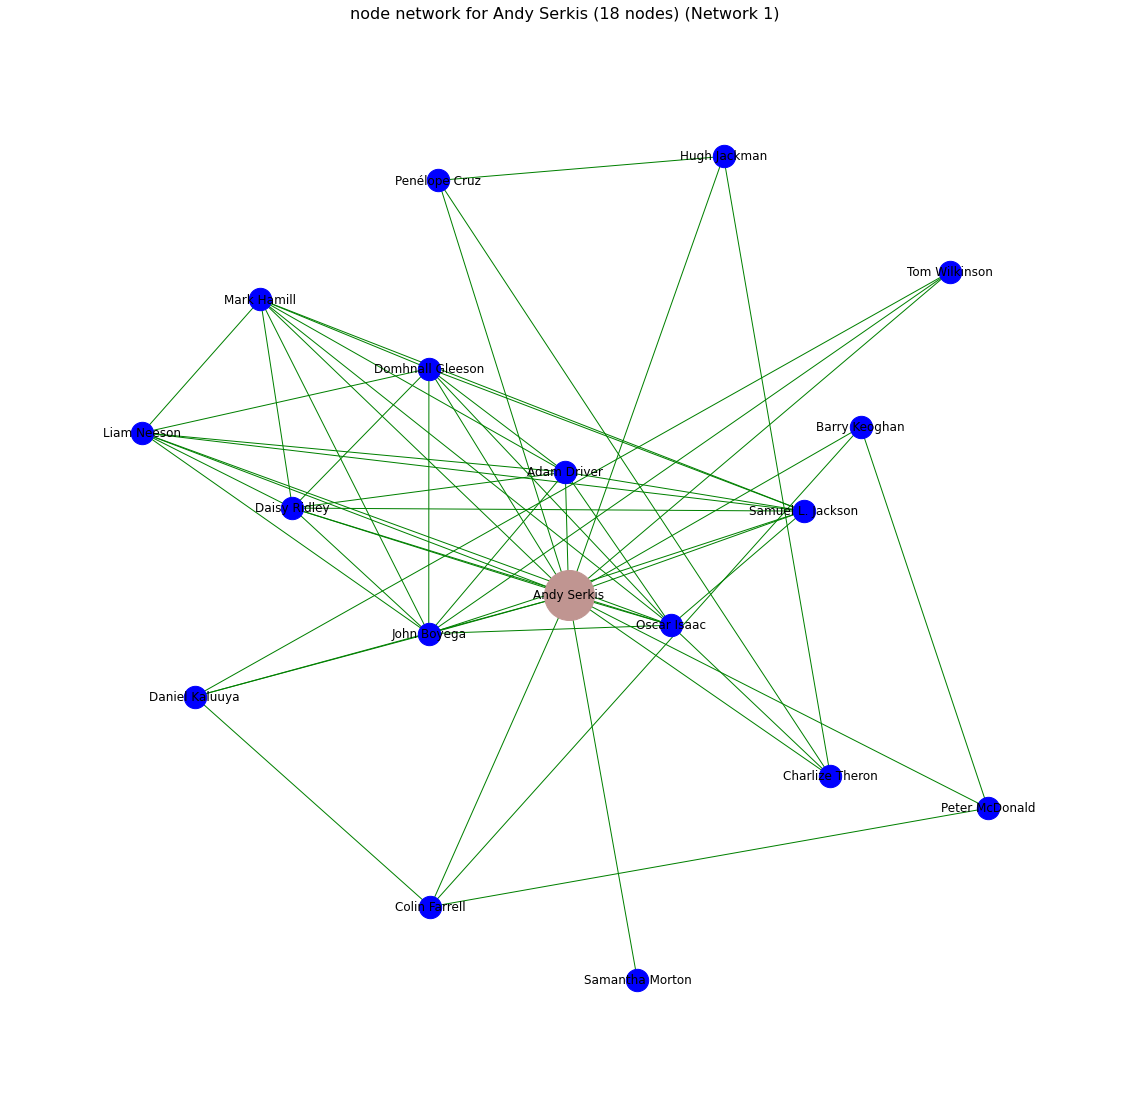

Network 1 node: Andy Serkis
Number of nodes: 18
Number of edges: 56
Density: 0.366
Connected: True
Diameter: 2
Average shortest path length: 1.634
Average clustering coefficient: 0.821
Average degree: 6.222


In [369]:
Display_node(net1, 1, 'Andy Serkis')


Now we will for the second network (net2)

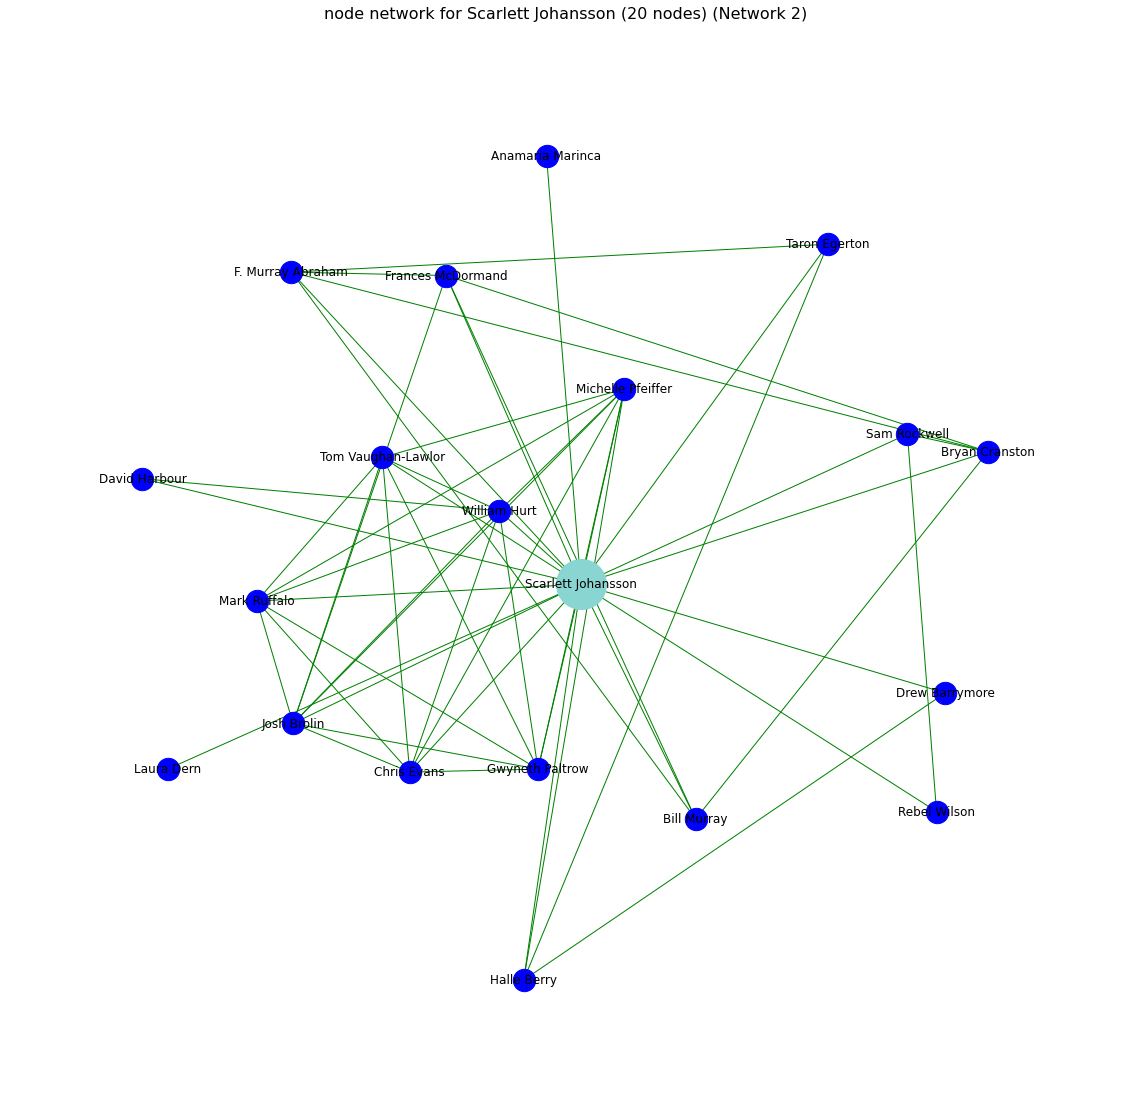

Network 2 node: Scarlett Johansson
Number of nodes: 20
Number of edges: 54
Density: 0.284
Connected: True
Diameter: 2
Average shortest path length: 1.716
Average clustering coefficient: 0.725
Average degree: 5.400


In [370]:
Display_node(net2, 2, 'Scarlett Johansson')


As we cam see thers some difrences between the two network The first Network has 18 node for andy serkis and The second network has 20 nodes for scarleet johnson but they do have something in common they both are connected and they both have Diamater of 2 But the rest of the satistics is diffrent not that diffrent but minor diffrences 

# Task 5 Network Visualisation

For This Task I will use gephi to with code i wrote to save it as a gexf file and then load up and modify it from there

In [267]:
import pprint 
nx.write_gexf(net1, 'net1.gexf', prettyprint=True)

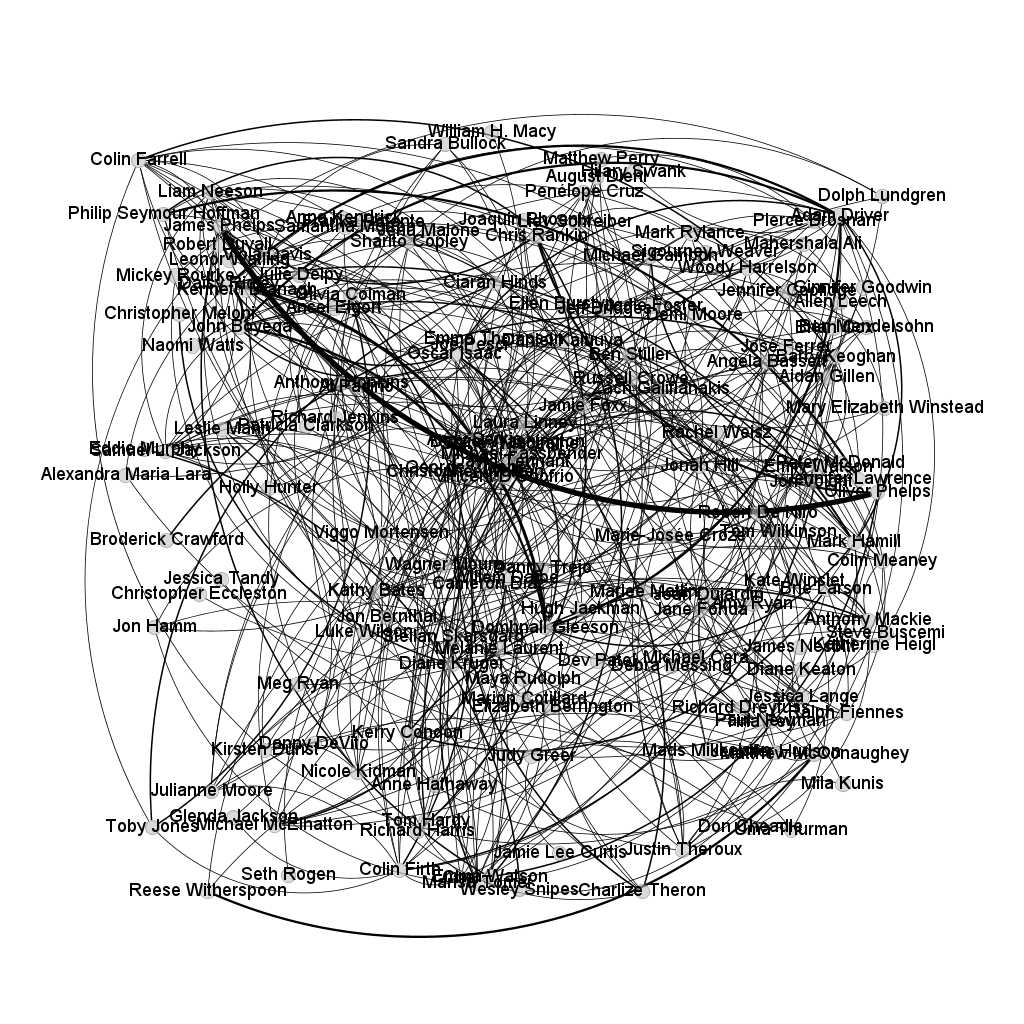# 

In [268]:
nx.write_gexf(net2,'net2.gexf', prettyprint=True)

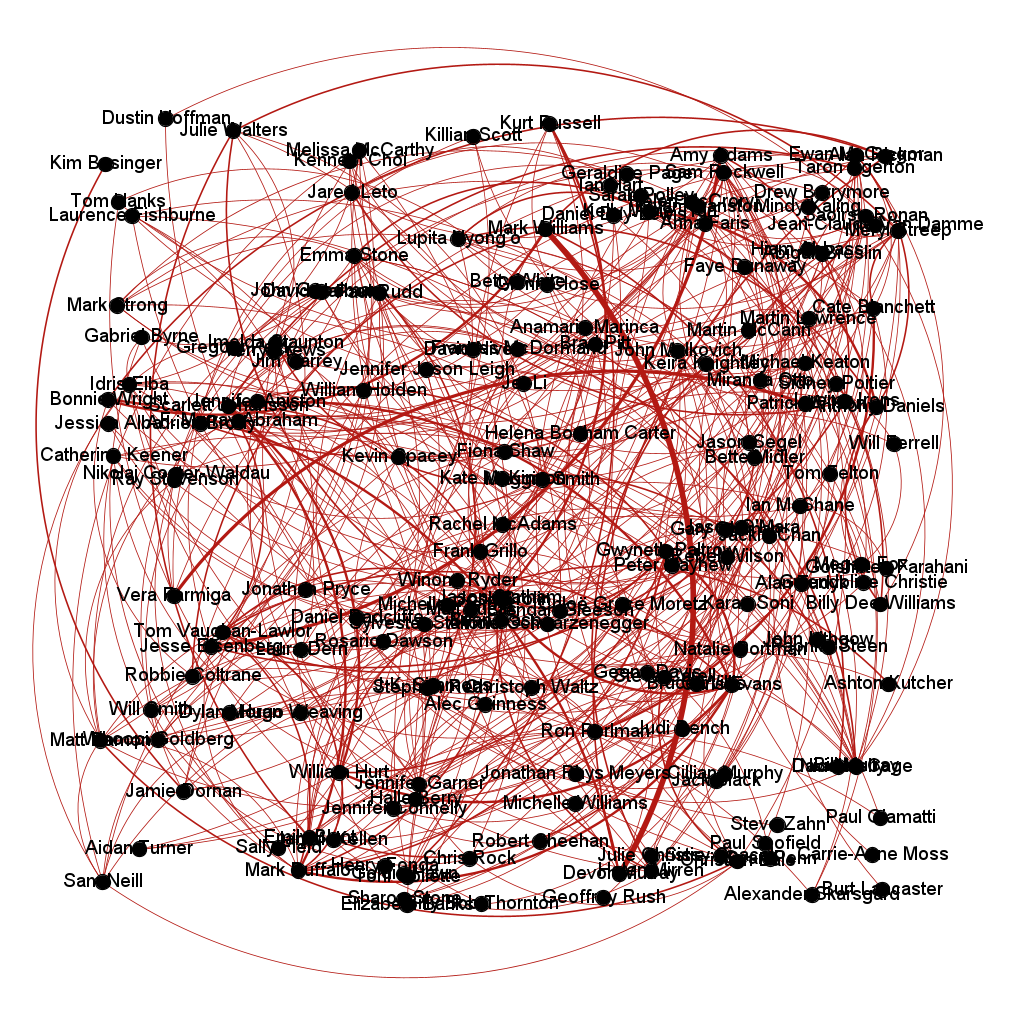# 

These are The graphs That we used it on Grephi to display The Nodes and edges as you can see each node repsented by an actor from The DataSet we got from the begging 

in Gephi i got the gexf file that created and saved and lodout in the softwaare next what i did is Changed the layout and also added the labels to the nodes and changed the frontsize of them and also changed the colours of them to make them unique from each other 

# Conclusion 

I really enjoyed working on this assigment espicilly using networkx for the first time and seeing all the libirires and the intreasting functions it has and also very interesting to compare two different networks, to see the difference that different values for centrality measures can have on very similar networks.

In conclusion, the Python package NetworkX offers a strong and flexible tool for manipulating graphs and networks. It offers a comprehensive collection of tools for designing, modifying, and analysing graphs as well as a large selection of visualisation choices for showcasing graph features and structures.

The flexibility and simplicity of use of NetworkX are two of its main benefits. It offers a large number of functions and algorithms for dealing with graphs of different forms, including directed and undirected graphs, weighted and unweighted graphs, and bipartite graphs, among others. Users may construct and manage graphs using a simple and intuitive API.

I enjoyed using the software Gephi. would want to learn more about Gephi and consider using it for both presenting and analysing.  it's a very intreasting software to use.

Python users may deal with graphs and networks using the NetworkX library, which is a strong and adaptable programme. It is a useful tool for data scientists, researchers, and developers working in a variety of domains, from social network analysis and bioinformatics to machine learning and artificial intelligence, because to its simplicity of use, adaptability, and interaction with other data science libraries.